In [1]:
import numpy as np
from numpy import array, arange, zeros, diag, mean, max, min, sqrt, meshgrid, loadtxt
from numpy.linalg import eig, svd

from matplotlib.pyplot import plot, show, legend, xlabel, ylabel, title, subplots

In [2]:
def heatplot(Y):
    N=2048
    x = 2*np.pi*np.arange(1,N+1)/N
    tt = arange(0,10,0.01)

    fig, ax = subplots(1,1)
    X, T = meshgrid(x, tt)
    im = ax.pcolormesh(X, T, Y, cmap='inferno', rasterized=True)
    fig.colorbar(im)
    show()

def print_shapes():
    global U, S, VT
    print(f'shapes: U.S.V^T={(U@S@VT).shape}, U={U.shape}, S={S.shape}, VT={VT.shape}')  

def print_nmae(x,y):
    print(f'nmae: {100*mean( abs(x-y) )/max(x):.4f} %')      

# SVD theory

$$

A_{(m \times n)}=U_{(m \times m)} \times S_{(m \times n)} \times V^T_{(n \times n)} \\

U = eigvectors(A \times A^T) \\

S = \begin{bmatrix} 
    s_0 &   0   &   0   \dots \\  
    0   &   s_1 &   0   \dots \\  
    0   &   0   &   s_2 \dots \\  
    0   &   0   &   0   \dots \\
    \end{bmatrix} \\

V = A^T \times A

$$

# easy example

Begin with data A, which could be anything such as a linear transformation of the form $Ax=b$

$$
A = \begin{bmatrix} 
    1 & 2 & 3 \\  
    4 & 5 & 6 \\  
    \end{bmatrix} \\
$$    

In [3]:
A = array( [ [ 1, 2, 3],
             [ 4, 5, 6]  ] )
print(f'shape {A.shape}')             

shape (2, 3)


In [4]:
U, s, VT = svd(A) # VT is V.T

print(f'shape {U.shape}')
print(U)

shape (2, 2)
[[-0.3863177   0.92236578]
 [-0.92236578 -0.3863177 ]]


In [5]:
print(f'shape {s.shape}')
print(s)

shape (2,)
[9.508032   0.77286964]


In [6]:
print(VT)

[[-0.42866713 -0.56630692 -0.7039467 ]
 [-0.80596391 -0.11238241  0.58119908]
 [ 0.40824829 -0.81649658  0.40824829]]


Python returns a vector of singular values, but we need a rectuangular matrix for the math to work

In [7]:
S = zeros( (A.shape[0], A.shape[1]) )

S[ :A.shape[0], :A.shape[0] ] = diag(s)

Now we can recreate the original vector, more or less perfectly. In case it's not _exactly_ $A$ we call it $\hat A$ (Ahat).

In [8]:
Ahat = U @ S @ VT
print_nmae(A,Ahat)

nmae: 0.0000 %


$$

A = USV^T \\

\begin{bmatrix} 
    1 & 2 & 3\\  
    4 & 5 & 6\\  
\end{bmatrix} = 

\begin{bmatrix} 
    -0.39 & 0.92 \\  
    -0.92 & -0.39 \\  
\end{bmatrix} 

\begin{bmatrix} 
    9.5 & 0 \\  
    0 & 0.77 \\  
\end{bmatrix} 

\begin{bmatrix} 
    -0.43 & -0.81 & 0.41  \\  
    -0.57 & -0.11 & -0.81 \\  
    -0.70 & 0.58 & 0.41  \\  
\end{bmatrix}^T 

$$    


## economy svd

In [9]:
A = array( [ [ 1, 2, 3],
             [ 4, 5, 6]  ] ) # same A, just a reminder

U, s, VT = svd(A) # VT is V.T

quick function to clean up the s-vector to s-rectangular-matrix bit

In [10]:
def s_to_rectangle(A,s):
    S = zeros((A.shape[0], A.shape[1]))
    S[:A.shape[0], :A.shape[0]] = diag(s)
    return S

S = s_to_rectangle(A,s) 

reduce $S$ and $V^T$ down to a smaller "economic" number of values $k$

In [11]:
def reduce_S_and_VT(S, VT, k): # k is the number of singular values    
    S =   S[:, :k]
    VT = VT[:k, :]
    return (S, VT)

S, VT = reduce_S_and_VT(S, VT, 1)

reconstruct $A$ as $\hat A$

In [12]:
Ahat = U @ S @ VT

print_shapes()
print_nmae(A,Ahat)

shapes: U.S.V^T=(2, 3), U=(2, 2), S=(2, 1), VT=(1, 3)
nmae: 4.2131 %


# Kura-Siva 
raw data

shape D=(1000, 2048)


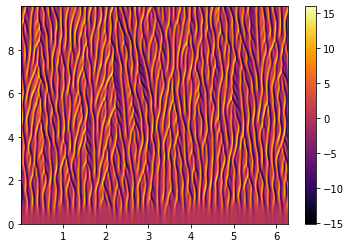

In [13]:
D = loadtxt('kura_siva_solution.csv', delimiter=',')

print(f'shape D={D.shape}')

heatplot(D)

## SVD - all singular values

shapes: U.S.V^T=(1000, 2048), U=(1000, 1000), S=(1000, 2048), VT=(2048, 2048)
nmae: 0.0000 %


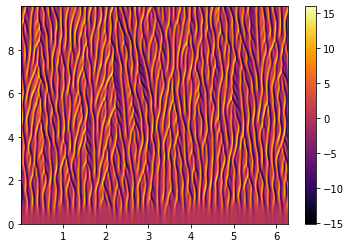

In [14]:
U, s, VT = svd(D)
S = s_to_rectangle(D,s)    

Dhat = U @ S @ VT

print_shapes()
print_nmae(D, Dhat)

heatplot(Dhat)

## SVD - 100 singular values

shapes: U.S.V^T=(1000, 2048), U=(1000, 1000), S=(1000, 100), VT=(100, 2048)
nmae: 0.1579 %


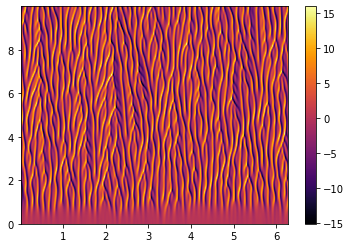

In [15]:
U, s, VT = svd(D)
S = s_to_rectangle(D,s)    
S, VT = reduce_S_and_VT(S, VT, 100)    

Dhat = U @ S @ VT

print_shapes()
print_nmae(D, Dhat)

heatplot(Dhat)

## SVD - 10 singular values

shapes: U.S.V^T=(1000, 2048), U=(1000, 1000), S=(1000, 10), VT=(10, 2048)
nmae: 15.8042 %


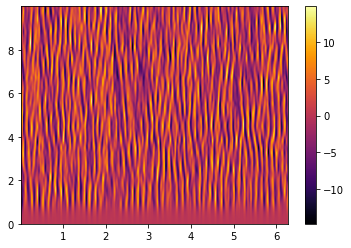

In [16]:
U, s, VT = svd(D)
S = s_to_rectangle(D,s)    
S, VT = reduce_S_and_VT(S, VT, 10)    

Dhat = U @ S @ VT

print_shapes()
print_nmae(D, Dhat)

heatplot(Dhat)